In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
#csvファイル読込。
df = pd.read_csv("./ks-projects-201801.csv")
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


In [3]:
#データ数。
display(df.count())
display(len(df))
display(len(df.columns))

ID                  378661
name                378657
category            378661
main_category       378661
currency            378661
deadline            378661
goal                378661
launched            378661
pledged             378661
state               378661
backers             378661
country             378661
usd pledged         374864
usd_pledged_real    378661
usd_goal_real       378661
dtype: int64

378661

15

In [4]:
#欠損値の確認。
display(df.isnull().sum())

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
#欠損値のある行は削除。
df = df.dropna(how='any')
display(df.isnull().sum())

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [6]:
#ID name category main_category currency deadline goal launched pledged
#state backers country usd pledged usd_pledged_real usd_goal_real
#説明変数
#使えそう
#main_category, deadline(締切),
#launched(開始日), country, usd_goal_real(目標額USD？)
#main_categoryとusd_goalはセットで使えそう。(高価くても人気のジャンルとか、高価いといらないジャンルとか。)単体だと？
#deadlineとlaunchedはそのままじゃなくて期間にしたほうが都合よさそう。時間？日にち？
#countryは国によって成功率違うとかあるなら使えるか？

#category, currency(通貨),  goal(目標額) は使わないかも。
#(main_category > category、countryとcurrncyはほぼ等価、USD/currency * goal =usd_goal_real)

#使えなさそう
#ID, name, pledged(支援額), backers(支援者数), usd pledged(支援額USD), usd_pledged_real

#目的変数
#state

In [7]:
#Stateの確認。
df['state'].value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

In [8]:
#使うのはsuccesfullとfailedだけ？canceled,suspendedも失敗扱いか？>数が少ないから無視。
#canceled　中断
#undefined　未定義
#live　生きてる、まだ実行中？
#suspended　中断
df_success = (df[df['state']=='successful'])
df_failed =  (df[df['state']=='failed'])
df_canceled =  (df[df['state']=='canceled'])
df_suspended =  (df[df['state']=='suspended'])
df_live =  (df[df['state']=='live'])

df_state = pd.concat([df_success,df_failed])
df_state

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
11,100005484,Lisa Lim New CD!,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
14,1000057089,Tombstone: Old West tabletop game and miniatur...,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
18,1000070642,Mike Corey's Darkness & Light Album,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.00
20,1000072011,CMUK. Shoes: Take on Life Feet First.,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:11,34268.00,successful,624,US,34268.00,34268.00,20000.00
24,1000091520,The Book Zoo - A Mini-Comic,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,701.66,successful,66,US,701.66,701.66,175.00
25,1000102741,Matt Cavenaugh & Jenny Powers make their 1st a...,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,15827.00,successful,147,US,15827.00,15827.00,10000.00
27,1000104688,Permaculture Skills,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,48905.00,successful,571,CA,43203.25,42174.03,15313.04
28,1000104953,Rebel Army Origins: The Heroic Story Of Major ...,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,112.38,successful,27,GB,167.70,160.60,142.91


failed        197611
successful    133851
Name: state, dtype: int64

([<matplotlib.patches.Wedge at 0x182e4465dd8>,
 [Text(-0.32734,1.05017,'failed'), Text(0.32734,-1.05017,'successful')])

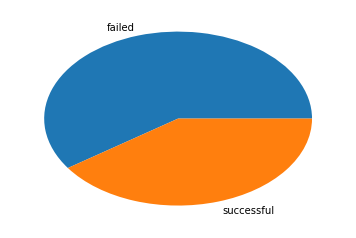

In [9]:
#Stateの割合。
display(df_state['state'].value_counts())
display(plt.pie(df_state['state'].value_counts(), labels=df_state['state'].value_counts().keys()))


Product Design       18679
Documentary          14523
Music                12485
Tabletop Games       11744
Shorts               11394
Food                 10416
Video Games           9327
Film & Video          8601
Fiction               8108
Fashion               7529
Art                   7486
Nonfiction            7414
Theater               6684
Rock                  6246
Children's Books      6198
Apparel               6165
Technology            5723
Indie Rock            5329
Apps                  5287
Photography           5246
Webseries             5148
Publishing            5020
Narrative Film        4617
Comics                4581
Web                   4309
Country & Folk        4213
Crafts                4152
Design                3547
Hip-Hop               3459
Hardware              3114
                     ...  
Blues                  234
Animals                229
Couture                227
Fabrication Tools      215
Makerspaces            208
Movie Theaters         201
P

([<matplotlib.patches.Wedge at 0x182e44cbe48>,
 [Text(1.08281,0.193728,'Product Design'),
  Text(0.96967,0.519364,'Documentary'),
  Text(0.806573,0.747957,'Music'),
  Text(0.615143,0.911921,'Tabletop Games'),
  Text(0.402023,1.0239,'Shorts'),
  Text(0.183312,1.08462,'Food'),
  Text(-0.0216634,1.09979,'Video Games'),
  Text(-0.207331,1.08028,'Film & Video'),
  Text(-0.375104,1.03407,'Fiction'),
  Text(-0.523688,0.967342,'Fashion'),
  Text(-0.655594,0.883287,'Art'),
  Text(-0.773393,0.782217,'Nonfiction'),
  Text(-0.870708,0.67221,'Theater'),
  Text(-0.946352,0.56073,'Rock'),
  Text(-1.00576,0.445477,"Children's Books"),
  Text(-1.05094,0.32484,'Apparel'),
  Text(-1.0808,0.204617,'Technology'),
  Text(-1.09627,0.0904873,'Indie Rock'),
  Text(-1.09982,-0.0200894,'Apps'),
  Text(-1.09234,-0.129604,'Photography'),
  Text(-1.07429,-0.236412,'Webseries'),
  Text(-1.04656,-0.338687,'Publishing'),
  Text(-1.01131,-0.432735,'Narrative Film'),
  Text(-0.969789,-0.519144,'Comics'),
  Text(-0.92265

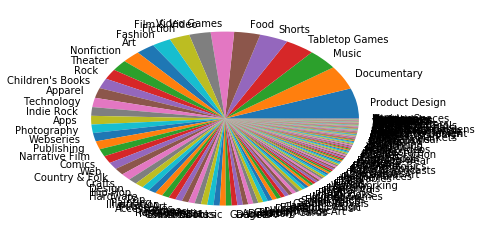

In [10]:
#Categoryの割合。細分化しすぎ。10件しかないのとかある。
display(df_state['category'].value_counts())
display(plt.pie(df_state['category'].value_counts(), labels=df_state['category'].value_counts().keys()))


Film & Video    56503
Music           45801
Publishing      35413
Games           28520
Technology      27046
Art             25640
Design          25363
Food            22054
Fashion         19774
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4148
Dance            3573
Name: main_category, dtype: int64

([<matplotlib.patches.Wedge at 0x182ef030470>,
 [Text(0.945995,0.561331,'Film & Video'),
  Text(0.0721364,1.09763,'Music'),
  Text(-0.712099,0.8384,'Publishing'),
  Text(-1.06282,0.283554,'Games'),
  Text(-1.06133,-0.289091,'Technology'),
  Text(-0.793299,-0.762021,'Art'),
  Text(-0.348215,-1.04343,'Design'),
  Text(0.139672,-1.0911,'Food'),
  Text(0.550156,-0.952538,'Fashion'),
  Text(0.795391,-0.759838,'Theater'),
  Text(0.924994,-0.595303,'Comics'),
  Text(1.0189,-0.414531,'Photography'),
  Text(1.07338,-0.240544,'Crafts'),
  Text(1.0937,-0.117524,'Journalism'),
  Text(1.09937,-0.0372442,'Dance')])

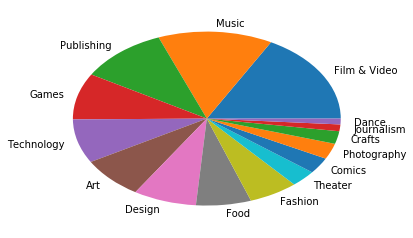

In [11]:
#main_Categoryの割合。
display(df_state['main_category'].value_counts())
display(plt.pie(df_state['main_category'].value_counts(), labels=df_state['main_category'].value_counts().keys()))


([<matplotlib.patches.Wedge at 0x182ef19acc0>,
 [Text(-0.865985,0.678284,'USD'),
  Text(0.547582,-0.95402,'GBP'),
  Text(0.885903,-0.652056,'EUR'),
  Text(1.02105,-0.409223,'CAD'),
  Text(1.0778,-0.219869,'AUD'),
  Text(1.09152,-0.136299,'SEK'),
  Text(1.09488,-0.106042,'MXN'),
  Text(1.09722,-0.0781482,'NZD'),
  Text(1.09861,-0.0552541,'DKK'),
  Text(1.09931,-0.0388174,'CHF'),
  Text(1.09969,-0.0259577,'NOK'),
  Text(1.0999,-0.0149187,'HKD'),
  Text(1.09999,-0.00521274,'SGD'),
  Text(1.1,-0.000239657,'JPY')])

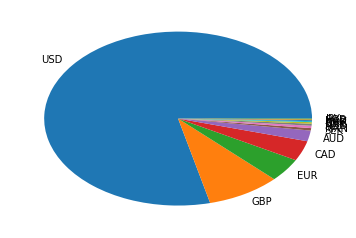

In [12]:
#currencyの割合。
plt.pie(df_state['currency'].value_counts(), labels=df_state['currency'].value_counts().keys())


C:\Users\M\AppData\Roaming\Python\Python36\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


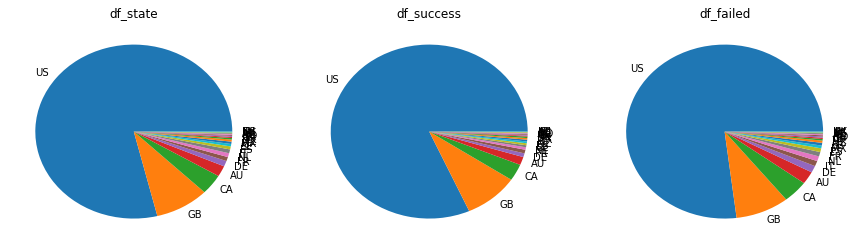

In [13]:
#countryの割合。
fig, (L, C, R) = plt.subplots(ncols=3, figsize=(15,4))

L.pie(df_state['country'].value_counts(), labels=df_state['country'].value_counts().keys())
L.set_title('df_state')

C.pie(df_success['country'].value_counts(), labels=df_success['country'].value_counts().keys())
C.set_title('df_success')

R.pie(df_failed['country'].value_counts(), labels=df_failed['country'].value_counts().keys())
R.set_title('df_failed')

fig.show()

In [14]:
#使えそうな項目だけコピー。
df_sel = df_state.loc[:,['state','category','main_category','currency','deadline','goal','launched','country', 'usd_goal_real']]
df_sel

,state,category,main_category,currency,deadline,goal,launched,country,usd_goal_real
5,successful,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,US,50000.00
6,successful,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,US,1000.00
11,successful,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,US,12500.00
14,successful,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,GB,6469.73
18,successful,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,US,250.00
20,successful,Fashion,Fashion,USD,2013-12-30,20000.0,2013-11-25 07:06:11,US,20000.00
24,successful,Comics,Comics,USD,2014-11-12,175.0,2014-10-23 17:15:50,US,175.00
25,successful,Music,Music,USD,2011-01-06,10000.0,2010-12-07 23:16:50,US,10000.00
27,successful,Webseries,Film & Video,CAD,2014-12-14,17757.0,2014-11-14 18:02:00,CA,15313.04
28,successful,Comics,Comics,GBP,2016-01-28,100.0,2015-12-29 16:59:29,GB,142.91


In [15]:
#dummy変数に置き換え。
#pd.get_dummies(df_sel)
#一気にやるとメモリエラー？

#各列ずつ変換して横結合。→散布図表示が重すぎる,category,countryがOneHotベクトル？だと項目数多すぎる
#pd.concat([df_sel, 
#           pd.get_dummies(df_sel['state']), 
#           pd.get_dummies(df_sel['category']), 
#           pd.get_dummies(df_sel['main_category']), 
#           pd.get_dummies(df_sel['currency']), 
#           pd.get_dummies(df_sel['country'])],
#          axis = 1)

#LabelEncoderで変換。
le = LabelEncoder()
le = le.fit(df_sel['state'])
df_sel['state'] = le.transform(df_sel['state'])
le = le.fit(df_sel['category'])
df_sel['category'] = le.transform(df_sel['category'])
le = le.fit(df_sel['main_category'])
df_sel['main_category'] = le.transform(df_sel['main_category'])
le = le.fit(df_sel['currency'])
df_sel['currency'] = le.transform(df_sel['currency'])
le = le.fit(df_sel['country'])
df_sel['country'] = le.transform(df_sel['country'])

#deadline - launchedで期間(日数)。
df_sel['time_dif'] = (pd.to_datetime(df_sel[
    'deadline']) - pd.to_datetime(df_sel['launched'])).dt.days
del df_sel['deadline']
del df_sel['launched']
df_sel

,state,category,main_category,currency,goal,country,usd_goal_real,time_dif
5,1,123,7,13,50000.0,21,50000.00,34
6,1,58,7,13,1000.0,21,1000.00,19
11,1,72,10,13,12500.0,21,12500.00,29
14,1,136,8,5,5000.0,9,6469.73,27
18,1,90,10,13,250.0,21,250.00,14
20,1,52,5,13,20000.0,21,20000.00,34
24,1,26,1,13,175.0,21,175.00,19
25,1,90,10,13,10000.0,21,10000.00,29
27,1,153,6,1,17757.0,3,15313.04,29
28,1,26,1,5,100.0,9,142.91,29


In [16]:
#とりあえず散布図。とても重いのでコメントアウト。
#pd.plotting.scatter_matrix(df_sel, figsize=(30,30))
#plt.savefig("fig1.png")#show()より後だとなぜか保存できない。
#plt.show()

In [26]:
#コピーした中から使いそうな項目をさらにピックアップ。
df_sel_sel =  df_sel.loc[:,['state', 'main_category', 'usd_goal_real', 'time_dif', 'country']]
df_sel_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 5 to 378660
Data columns (total 5 columns):
state            331462 non-null int64
main_category    331462 non-null int64
usd_goal_real    331462 non-null float64
time_dif         331462 non-null int64
country          331462 non-null int64
dtypes: float64(1), int64(4)
memory usage: 25.2 MB


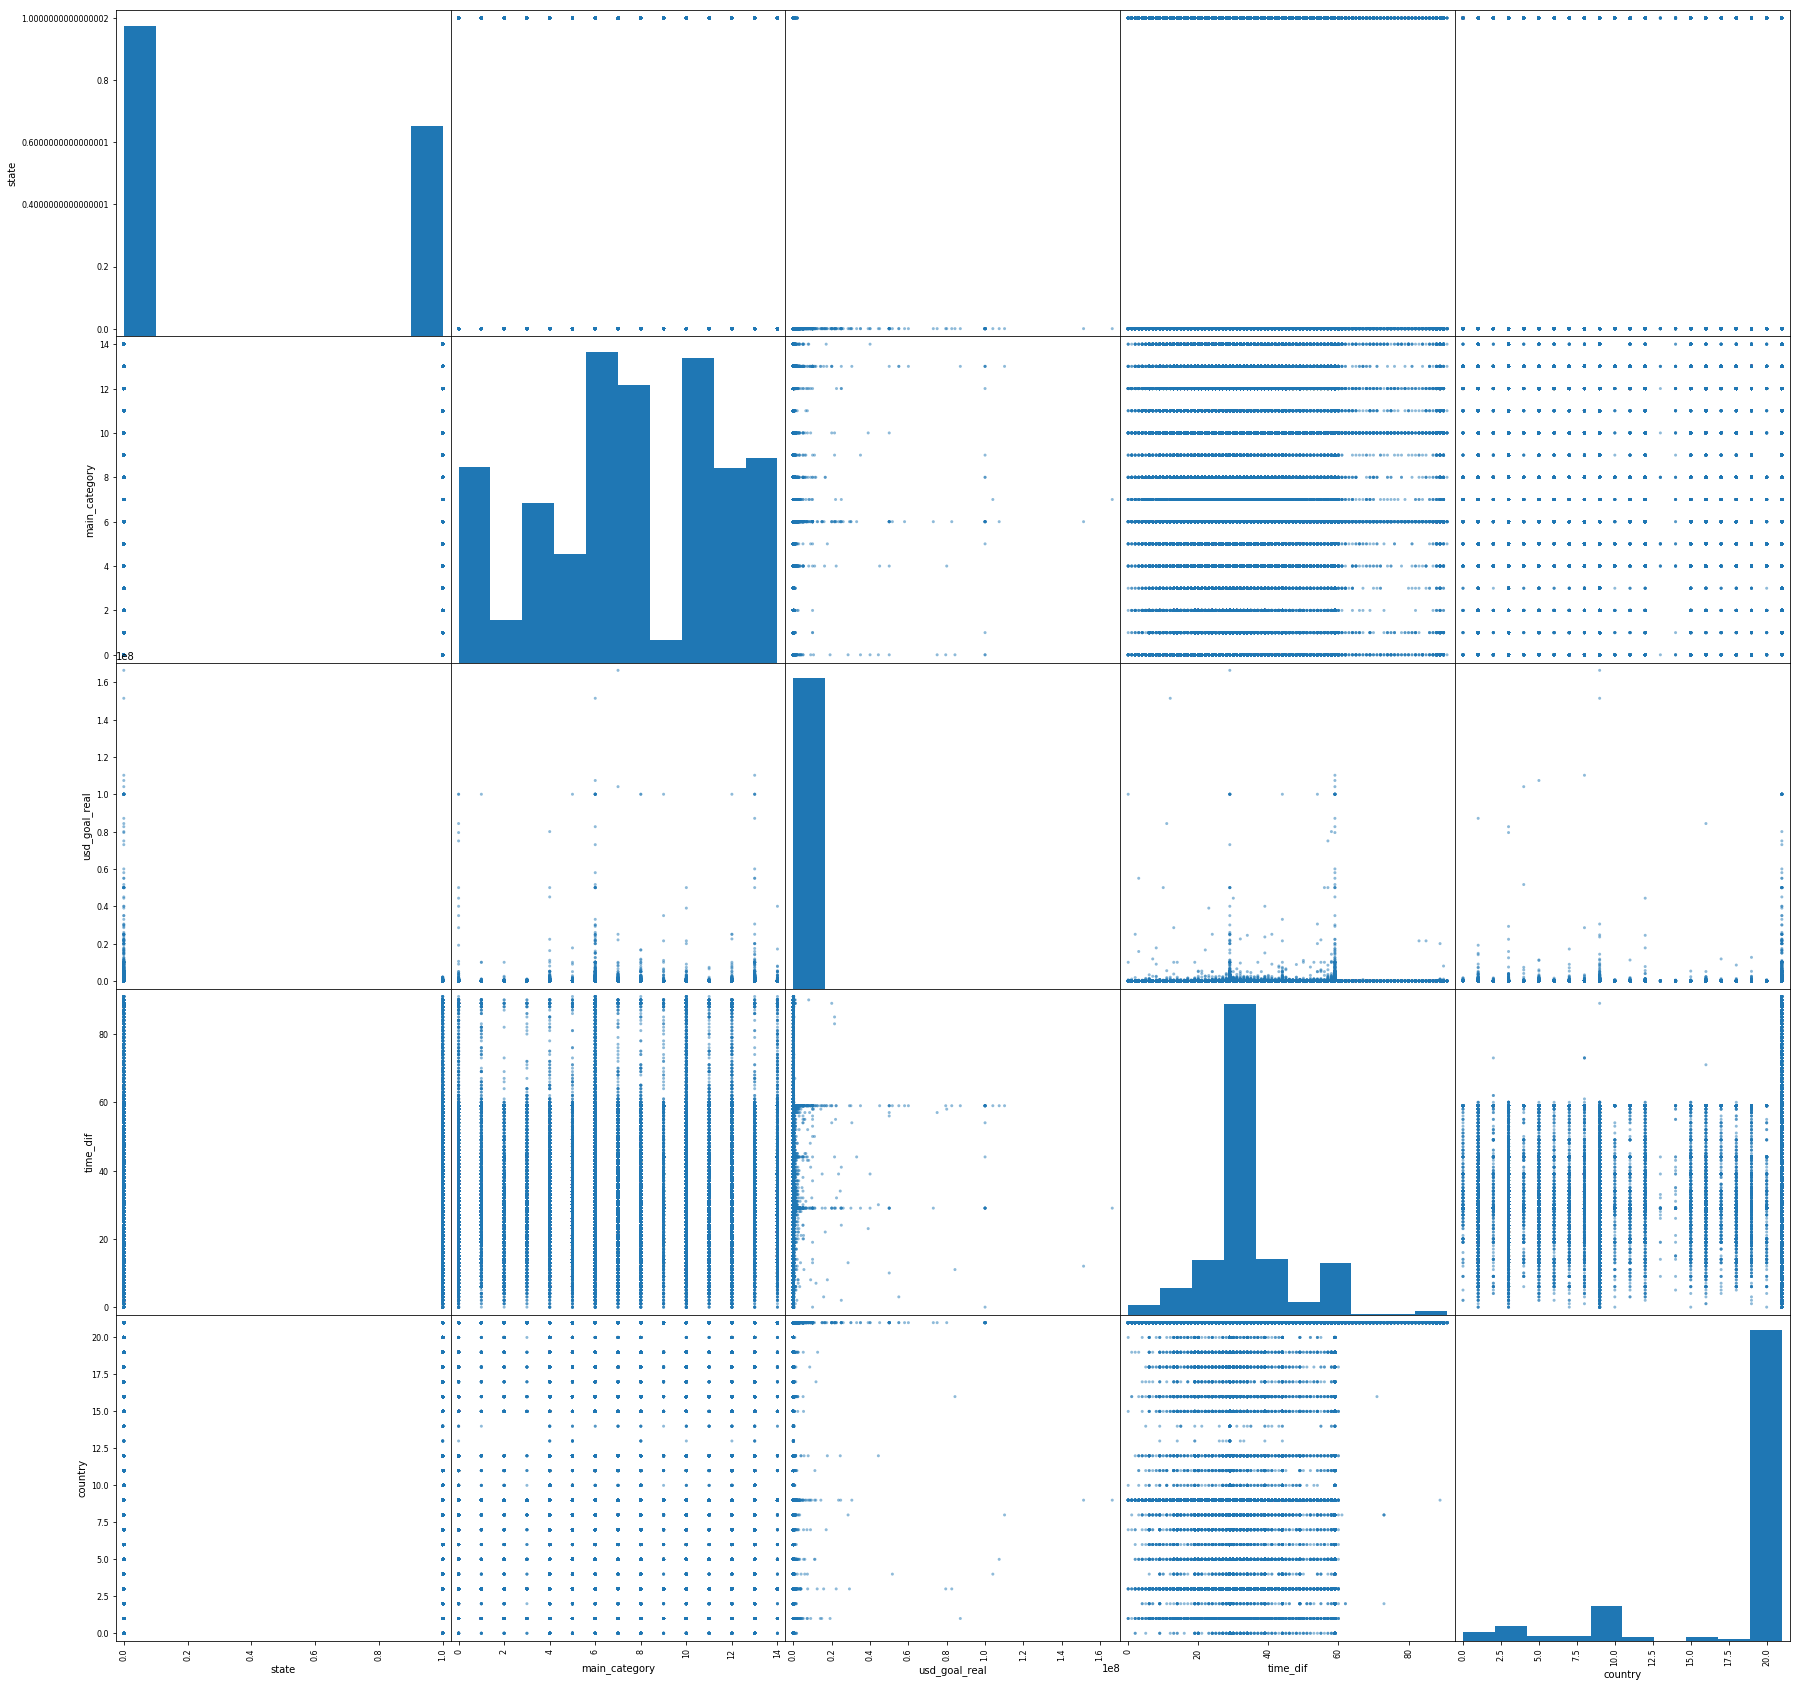

In [27]:
#ピックアップした中からさらに散布図。
pd.plotting.scatter_matrix(df_sel_sel, figsize=(30,30))
plt.savefig("fig2.png")
plt.show()

In [28]:
y = df_sel_sel["state"].values
X = df_sel_sel.drop('state', axis=1).values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, random_state=1234)
#loss:損失関数　log:ロジスティック回帰
#max_iter　エポック
#fit_intercept
#random_state　データをシャッフルするときに使用する疑似乱数ジェネレータのシード
clf.fit(X, y)

w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
w3 = clf.coef_[0, 2]
w4 = clf.coef_[0, 3]

print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}'.format(w0, w1, w2, w3, w4))


w0 = 15609.389, w1 = 110759.819, w2 = -1177.680, w3 = 408661.481, w4 = 297137.330


In [29]:
y_prd = clf.predict(X)
# 対数尤度
(- log_loss(y, y_prd))

-16.483526196606622

In [30]:
#混同行列。failedが0、succesfullが1
conf_matrix = pd.DataFrame(confusion_matrix(y, y_prd, labels = [0,1]), 
                           index = ['N_true', 'P_true'], 
                           columns = ['N_pred', 'P_pred'])
conf_matrix

,N_pred,P_pred
N_true,57944,139667
P_true,18519,115332


In [31]:
#正解率(TP+TN/TP+TN+FP+FN)
100 * accuracy_score(y, y_prd)

52.2762790304771

In [32]:
#精度(TP/TP+FP)
100 * precision_score(y, y_prd)

45.228412660441805

In [33]:
#検出率(TP/TP+FN)
100 * recall_score(y, y_prd)

86.16446645897304

In [34]:
#Fスコア
100 * f1_score(y, y_prd)

59.31953195319532